# Install necessary libraries

In [1]:
!pip install pandas numpy scipy seaborn matplotlib scikit-learn sweetviz tensorflow --upgrade --user --quiet

# Data Analysis

In [2]:
import pandas as pd
import numpy as np

## Overview of dataset

In [3]:
# Load the dataset
data = pd.read_csv('./data/train.csv')

# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Display summary statistics
print(data.describe())


   Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  ...  Health  Quantity  Fee  State  \
0             1  ...       1         1  100  41326   
1             2  ...       1         1    0  41401   
2             2  ...       1         1    0  41326   
3             2  ...       1         1  150  41401   
4             2  ...       1         1    0  41326   

                          RescuerID  VideoAmt  \
0  8480853f516546f6cf33aa88cd76c379         0   
1  3082c7125d8fb66f7dd4bff4192c8b14         0   
2  fa90fa5b1ee11c86938398b60abc32cb         0   
3  9238e4f44c71a

## Mapping feature code IDs

In [4]:
def mapFeatureIds(data):
    data['Type'] = data['Type'].replace({1: 'Dog', 2: 'Cat'})
    data['MaturitySize'] = data['MaturitySize'].replace({1 : 'Small', 2 : 'Medium', 3 : 'Large', 4 : 'Extra Large'})
    data['FurLength'] = data['FurLength'].replace({1 : 'Short', 2 : 'Medium', 3 : 'Long'})
    data['Vaccinated'] = data['Vaccinated'].replace({1 : 'Yes', 2 : 'No', 3 : 'Not Sure'})
    data['Dewormed'] = data['Dewormed'].replace({1 : 'Yes', 2 : 'No', 3 : 'Not Sure'})
    data['Sterilized'] = data['Sterilized'].replace({1 : 'Yes', 2 : 'No', 3 : 'Not Sure'})
    data['Health'] = data['Health'].replace({1 : 'Healthy', 2 : 'Minor Injury', 3 : 'Serious Injury'})
    data['Gender'] = data['Gender'].replace({1 : 'Male', 2 : 'Female', 3 : 'Mixed'})
    data['AdoptionSpeed'] = data['AdoptionSpeed'].replace({0 : '0', 1 : '1', 2 : '2', 3 : '3', 4 : '4'})
    
    # Load the breed_labels.csv into a DataFrame
    breed_labels_df = pd.read_csv('./data/breed_labels.csv')
    
    # Map breed codes to breed labels using a dictionary comprehension
    breed_map = {row['BreedID']: row['BreedName'] for index, row in breed_labels_df.iterrows()}
    
    # Replace values in the 'Breed' columns with breed labels
    data['Breed1'] = data['Breed1'].map(breed_map)
    data['Breed2'] = data['Breed2'].map(breed_map)
    
    
    # Load the color_labels.csv into a DataFrame
    color_labels_df = pd.read_csv('./data/color_labels.csv')
    
    # Map breed codes to breed labels using a dictionary comprehension
    color_map = {row['ColorID']: row['ColorName'] for index, row in color_labels_df.iterrows()}
    
    # Replace values in the 'Color' columns with Color labels
    data['Color1'] = data['Color1'].map(color_map)
    data['Color2'] = data['Color2'].map(color_map)
    data['Color3'] = data['Color3'].map(color_map)
    
    
    # Load the state_labels.csv into a DataFrame
    state_labels_df = pd.read_csv('./data/state_labels.csv')
    
    # Map state codes to state labels using a dictionary comprehension
    state_map = {row['StateID']: row['StateName'] for index, row in state_labels_df.iterrows()}
    
    # Replace values in the 'Color' columns with State labels
    data['State'] = data['State'].map(state_map)

mapFeatureIds(data)

# Verify the changes
print(data.sample(20))

      Type                                 Name  Age               Breed1  \
1177   Dog                     Milky And Coffie    1          Mixed Breed   
5007   Dog                            Snowflake  108     Golden Retriever   
54     Dog                                Dusty    3          Mixed Breed   
10996  Cat                              Blackie    2   Domestic Long Hair   
2168   Dog                                Rocky   10           Rottweiler   
8506   Dog                                Piper   36               Poodle   
7727   Cat  Brown Tabby Kitten Looking For Home    5  Domestic Short Hair   
5431   Dog                               Jessie    3          Mixed Breed   
9821   Dog                                  Tom    1          Mixed Breed   
11705  Cat                                  NaN    2  Domestic Short Hair   
13228  Cat                               Pebble    2                Tabby   
8972   Dog                                Lucky    0          Mixed Breed   

In [5]:
data.describe()

,Age,Quantity,Fee,VideoAmt,PhotoAmt
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,10.452078,1.576069,21.259988,0.056760,3.889215
std,18.155790,1.472477,78.414548,0.346185,3.487810
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,2.000000
50%,3.000000,1.000000,0.000000,0.000000,3.000000
75%,12.000000,1.000000,0.000000,0.000000,5.000000
max,255.000000,20.000000,3000.000000,8.000000,30.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  object 
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14988 non-null  object 
 4   Breed2         4231 non-null   object 
 5   Gender         14993 non-null  object 
 6   Color1         14993 non-null  object 
 7   Color2         10522 non-null  object 
 8   Color3         4389 non-null   object 
 9   MaturitySize   14993 non-null  object 
 10  FurLength      14993 non-null  object 
 11  Vaccinated     14993 non-null  object 
 12  Dewormed       14993 non-null  object 
 13  Sterilized     14993 non-null  object 
 14  Health         14993 non-null  object 
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  object 
 18  Rescue

## Automated Data Analysis for quick Visualisations

In [7]:
import sweetviz as sv

In [8]:
report = sv.analyze(data)

# Generate Sweetviz HTML report
report.show_html('./analysis/initial_analysis_report.html')

                                             |                                                                …

Report ./analysis/initial_analysis_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Data cleaning

## Rename feature columns to lower case

In [9]:
print(data.columns.tolist())

['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed']


In [10]:
def dataCleaningRenameLowerCase(data):
    data.rename(columns = {'Type' : 'type', 'Name' : 'name', 'Age' : 'age', 
                           'Breed1' :'breed1', 'Breed2' : 'breed2', 'Gender' : 'gender', 
                           'Color1' : 'color1', 'Color2' :'color2', 'Color3' : 'color3', 
                           'MaturitySize' : 'maturitysize', 'FurLength' : 'furlength', 'Vaccinated' : 'vaccinated', 
                           'Dewormed' : 'dewormed', 'Sterilized' : 'sterilized', 'Health' : 'health', 
                           'Quantity' : 'quantity', 'Fee' : 'fee', 'State' : 'state', 
                           'RescuerID' : 'rescuerid', 'VideoAmt' : 'videoamt', 
                           'Description' : 'description', 'PetID' : 'petid', 'PhotoAmt': 'photoamt', 
                           'AdoptionSpeed': 'adoptionspeed' }, inplace = True)

dataCleaningRenameLowerCase(data)

In [11]:
print(data.columns.tolist())

['type', 'name', 'age', 'breed1', 'breed2', 'gender', 'color1', 'color2', 'color3', 'maturitysize', 'furlength', 'vaccinated', 'dewormed', 'sterilized', 'health', 'quantity', 'fee', 'state', 'rescuerid', 'videoamt', 'description', 'petid', 'photoamt', 'adoptionspeed']


## Handle missing values

In [12]:
data.isnull().sum()

type                 0
name              1265
age                  0
breed1               5
breed2           10762
gender               0
color1               0
color2            4471
color3           10604
maturitysize         0
furlength            0
vaccinated           0
dewormed             0
sterilized           0
health               0
quantity             0
fee                  0
state                0
rescuerid            0
videoamt             0
description         13
petid                0
photoamt             0
adoptionspeed        0
dtype: int64

### Define drop feature columns

In [13]:
def dataCleaningDropFeatures(data, features):
    data.drop(columns=features, inplace=True)

### Define drop rows with missing values

In [14]:
def dataCleaningDropRowsWithMissingFeatureValues(data, features):
    for feature in features:
        # Drop rows with missing values in feature
        data.dropna(subset=feature, inplace=True)

### Missing text feature values

- Name feature column has approximately 8% missing values. We shall leave it as it is for the moment, perhaps we can engineer a new feature 'hasname' later on. We will drop name feature column later on before selecting features.

- For description, there are only 13 rows with missing values, we can also safely drop these rows. Creating a new feature 'hasdescription' has little significance as there are too few samples. We will drop these rows later.

### Categorical features with too many missing values

- breed2, color2 and color3 feature columns have too many missing values. Data imputation may cause unwanted biasness. However, we can engineer new features 'numcolor' and 'ispurebreed' later on. We will drop these features later on during feature selection.

### Meaningless features

- petid is also unlikey to have any meaningful relationship with adoptionspeed. We shall drop this feature later on during feature selection.

### Drop rows for features with few missing values

- For breed1, for simplicity, we shall drop rows with missing breed1 values, else we would need to train a separate model to predict it.

- As mentioned earlier, we will drop rows with missing descriptions too.

In [15]:
dataCleaningDropRowsWithMissingFeatureValues(data, ['breed1', 'description'])

In [16]:
data.isnull().sum()

type                 0
name              1263
age                  0
breed1               0
breed2           10753
gender               0
color1               0
color2            4467
color3           10589
maturitysize         0
furlength            0
vaccinated           0
dewormed             0
sterilized           0
health               0
quantity             0
fee                  0
state                0
rescuerid            0
videoamt             0
description          0
petid                0
photoamt             0
adoptionspeed        0
dtype: int64

# Feature Engineering

In [17]:
data.head()

,type,name,age,breed1,breed2,gender,color1,color2,color3,maturitysize,...,health,quantity,fee,state,rescuerid,videoamt,description,petid,photoamt,adoptionspeed
0,Cat,Nibble,3,Tabby,NaN,Male,Black,White,NaN,Small,...,Healthy,1,100,Selangor,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,Cat,No Name Yet,1,Domestic Medium Hair,NaN,Male,Black,Brown,NaN,Medium,...,Healthy,1,0,Kuala Lumpur,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,Dog,Brisco,1,Mixed Breed,NaN,Male,Brown,White,NaN,Medium,...,Healthy,1,0,Selangor,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,Dog,Miko,4,Mixed Breed,NaN,Female,Black,Brown,NaN,Medium,...,Healthy,1,150,Kuala Lumpur,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,Dog,Hunter,1,Mixed Breed,NaN,Male,Black,NaN,NaN,Medium,...,Healthy,1,0,Selangor,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


## Target feature

We shall predict if a pet will be adopted eventually. To do this, we shall convert

In [18]:
def createTargetIsAdopted(data):
    data['isadopted'] = data['adoptionspeed'].apply(lambda x: 0 if x == '4' else 1)

createTargetIsAdopted(data)

## Number of colours feature

In [19]:
def createNumColorFeature(data):
    # Count number of colors present
    data['numcolors'] = data[['color1', 'color2', 'color3']].notna().sum(axis=1)

createNumColorFeature(data)

## Is Pure Breed feature

In [20]:
def isPureBreedFeature(data):
    # Create a new column 'ispurebreed' based on conditions
    data['ispurebreed'] = data.apply(lambda x: 'Yes' if pd.notna(x['breed1']) and pd.isnull(x['breed2']) else 'No', axis=1)

isPureBreedFeature(data)

## Has name feature

In [21]:
def createHasNameFeature(data):
    # Create 'hasname' feature based on 'name' column
    data['hasname'] = data['name'].notna() & data['name'].str.strip().astype(bool)
    
    # Convert boolean to 'Y' and 'N'
    data['hasname'] = data['hasname'].map({True: 'Y', False: 'N'})

createHasNameFeature(data)

Replace missing name values with 'No Name'

In [22]:
data['name'] = data['name'].fillna('No Name')

## Bin features

In [23]:
def binAge(data):
    # Define bin edges
    bin_edges = [0, 3, 6, 12, 24, 60, 256]
    
    # Define bin labels
    bin_labels = ['0-3', '4-6', '7-12', '13-24', '25-60', '61-255']
    
    # Create bins for 'age'
    data['agebins'] = pd.cut(data['age'], bins=bin_edges, labels=bin_labels, right=False)

In [24]:
def binFee(data):
    # Define bin edges and labels
    bin_edges = [0, 1, 100, 200, 3001]
    bin_labels = ['0', '1-100', '101-200', '201-3000']
    
    # Create bins for 'fees'
    data['feesbins'] = pd.cut(data['fee'], bins=bin_edges, labels=bin_labels, right=False)

In [25]:
def binVideoAmt(data):
    # Define bin edges and labels
    bin_edges = [0, 1, 2, float('inf')]
    bin_labels = ['0', '1', '>=2']
    
    # Create bins for 'video_amt'
    data['videoamtbins'] = pd.cut(data['videoamt'], bins=bin_edges, labels=bin_labels, right=True, include_lowest=True)

In [26]:
def binPhotoAmt(data):
    # Define bin edges and labels
    bin_edges = [0, 1, 2, 3, 4, 5, 6, float('inf')]
    bin_labels = ['0', '1', '2', '3', '4', '5', '>=6']
    
    # Create bins for 'photo_amt'
    data['photoamtbins'] = pd.cut(data['photoamt'], bins=bin_edges, labels=bin_labels, right=False)

In [27]:
def binQuantity(data):
    # Define bin edges and labels
    bin_edges = [1, 2, 3, 4, 5, 6, float('inf')]
    bin_labels = ['1', '2', '3', '4', '5', '>=6']
    
    # Create bins for 'photo_amt'
    data['quantitybins'] = pd.cut(data['quantity'], bins=bin_edges, labels=bin_labels, right=False)

In [28]:
def binBreed(data):
    # Top 6 breeds maps
    breed_mapping = {
        'Domestic Long Hair': 'Domestic Long Hair',
        'Domestic Medium Hair': 'Domestic Medium Hair',
        'Domestic Short Hair': 'Domestic Short Hair',
        'Mixed Breed': 'Mixed Breed',
        'Siamese': 'Siamese',
        'Tabby': 'Tabby'
    }
    
    # Apply the mapping and assign 'Others' to unspecified breeds
    data['breedbins'] = data['breed1'].map(breed_mapping).fillna('Others')

In [29]:
def binState(data):
    # Define the mapping for state
    state_mapping = {
        'Johor': 'Johor',
        'Kuala Lumpur': 'Kuala Lumpur',
        'Negeri Sembilan': 'Negeri Sembilan',
        'Pulau Pinang': 'Pulau Pinang',
        'Perak': 'Perak',
        'Selangor': 'Selangor'
    }
    
    # Apply the mapping and assign 'Others' to unspecified states
    data['statebins'] = data['state'].map(state_mapping).fillna('Others')

In [30]:
def binRescuerId(data):
    # Find the top 30 most frequent rescuer IDs
    top_30_rescuerids = data['rescuerid'].value_counts().nlargest(30).index
    
    # Create a new feature 'rescuerid_binned'
    data['rescueridbins'] = data['rescuerid'].apply(lambda x: x if x in top_30_rescuerids else 'others')

In [31]:
def binFeatures(data, features):
    for feature in features:
        if feature == 'age':
            binAge(data)
        elif feature == 'fee':
            binFee(data)
        elif feature == 'photoamt':
            binPhotoAmt(data)
        elif feature == 'videoamt':
            binVideoAmt(data)
        elif feature == 'quantity':
            binQuantity(data)
        elif feature == 'breed1':
            binBreed(data)
        elif feature == 'state':
            binState(data)
        elif feature =='rescuerid':
            binRescuerId(data)
        else:
            continue

features_to_bin = ['age', 'fee', 'photoamt', 'videoamt', 'quantity', 'breed1', 'state', 'rescuerid']
binFeatures(data, features_to_bin)

## Re-analyse data with engineered features

### Automated analysis for quick visualisations

In [32]:
engineered_features_report = sv.analyze(data)

# Generate Sweetviz HTML report
engineered_features_report.show_html('./analysis/engineered_features_analysis_report.html') 

                                             |                                                                …

Report ./analysis/engineered_features_analysis_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Chi-square test to determine correlation of categorical features with adoption speed target

In [33]:
from scipy.stats import chi2_contingency

In [34]:
categorical_cols = ['type', 'gender', 'color1', 'maturitysize', 'furlength', 
                    'vaccinated', 'dewormed', 'sterilized', 'health', 
                    'hasname', 'agebins', 'feesbins', 'photoamtbins', 'videoamtbins', 
                    'quantitybins', 'breedbins', 'statebins', 'rescueridbins', 'ispurebreed', 'numcolors']

In [35]:
# Calculate Chi-square and p-values for each categorical feature
chi2_scores = []
p_values = []

for feature in categorical_cols:
    contingency_table = pd.crosstab(data[feature], data['isadopted'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_scores.append(chi2)
    p_values.append(p)

# Display results
results = pd.DataFrame({
    'Feature': categorical_cols,
    'Chi-square': chi2_scores,
    'p-value': p_values
})

# Sort results by Chi-square value from highest to lowest
sorted_results = results.sort_values(by='Chi-square', ascending=False)

print(sorted_results)

          Feature  Chi-square        p-value
10        agebins  862.169470  4.092574e-184
17  rescueridbins  732.083273  9.909306e-135
7      sterilized  664.722689  4.542576e-145
12   photoamtbins  364.797702   1.025561e-75
15      breedbins  233.153501   1.625567e-47
5      vaccinated  163.973640   2.475007e-36
16      statebins  162.071234   2.156345e-32
14   quantitybins   65.066343   1.085781e-12
4       furlength   62.029287   3.392434e-14
6        dewormed   56.188051   6.293898e-13
1          gender   31.271375   1.619971e-07
2          color1   28.462642   7.686506e-05
9         hasname   27.540283   1.538564e-07
0            type   24.843857   6.216685e-07
11       feesbins   24.554903   1.912908e-05
3    maturitysize   21.528083   8.177192e-05
18    ispurebreed   20.465026   6.073090e-06
19      numcolors   20.278883   3.949086e-05
8          health   16.146371   3.117885e-04
13   videoamtbins    7.720386   2.106393e-02


## Selecting features

#### Justification for Feature Selection:
- Significant Association: Features selected for the model exhibit significant associations with the target variable ('isadopted') based on chi-square tests.
- Statistical Significance: Features like 'agebins', 'sterilized', 'photoamtbins', 'breedbins', 'vaccinated', and 'statebins' have very low p-values (well below 0.05), indicating strong statistical significance in their relationship with pet adoption.
- Predictive Power: These features are likely to contribute significantly to the predictive power of your model, as they capture important aspects related to pet adoption such as age, sterilization status, breed type, vaccination status, and geographical location.
- Replacement Consideration: 'rescueridbins' was replaced with 'quantitybins' due to the latter's moderately significant association with 'isadopted', offering a potentially valuable predictor for adoption outcomes.
- Modeling Strategy: By focusing on features with strong statistical associations and predictive potential, the model is expected to better capture and generalize patterns related to pet adoption, thereby improving overall performance and interpretability

Note that rescueridbins feature is not selected due to its complexity and sparsity. The feature 'rescueridbins' likely has a high number of unique values (high cardinality), which can lead to sparsity. This means that many rescuers might have only a few instances, making it difficult for the model to learn meaningful patterns. We shall replace this with the next best option 'quantitybins'.

In [36]:
selected_features = ['agebins', 'sterilized', 'photoamtbins', 'breedbins', 'vaccinated', 'statebins', 'quantitybins', 'isadopted']

# Train Model

## Import libraries

In [37]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

## Copy dataframe and drop unused features

In [38]:
dataframe = data.copy()

With reference to the selected features above, we will drop all other features that are not selected. Take note that we will also be removing original features that have been binned or deemed to have little meaning

In [39]:
all_features = data.columns.tolist()

print('all features = ', all_features)

features_to_drop = []
for feature in all_features:
    if feature not in selected_features:
        features_to_drop.append(feature)

print()
print('features to drop = ', features_to_drop)

all features =  ['type', 'name', 'age', 'breed1', 'breed2', 'gender', 'color1', 'color2', 'color3', 'maturitysize', 'furlength', 'vaccinated', 'dewormed', 'sterilized', 'health', 'quantity', 'fee', 'state', 'rescuerid', 'videoamt', 'description', 'petid', 'photoamt', 'adoptionspeed', 'isadopted', 'numcolors', 'ispurebreed', 'hasname', 'agebins', 'feesbins', 'photoamtbins', 'videoamtbins', 'quantitybins', 'breedbins', 'statebins', 'rescueridbins']

features to drop =  ['type', 'name', 'age', 'breed1', 'breed2', 'gender', 'color1', 'color2', 'color3', 'maturitysize', 'furlength', 'dewormed', 'health', 'quantity', 'fee', 'state', 'rescuerid', 'videoamt', 'description', 'petid', 'photoamt', 'adoptionspeed', 'numcolors', 'ispurebreed', 'hasname', 'feesbins', 'videoamtbins', 'rescueridbins']


In [40]:
dataCleaningDropFeatures(dataframe, features_to_drop)

print(dataframe.columns.tolist())

['vaccinated', 'sterilized', 'isadopted', 'agebins', 'photoamtbins', 'quantitybins', 'breedbins', 'statebins']


## Train-Test-Validation split

In [41]:
train, val, test = np.split(dataframe.sample(frac=1), [int(0.8*len(dataframe)), int(0.9*len(dataframe))])

C:\Users\Damien Wee\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


## Input pipeline

This utility function converts each training, validation, and test set DataFrame into a tf.data.Dataset, then shuffles and batches the data.

In [42]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe.copy()
  labels = df.pop('isadopted')
  df = {key: value.values[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [43]:
batch_size = 256
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

## Preprocessing pipelines

### Numerical feature normalization

In [44]:
def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = layers.Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

### Categorical feature encoding

In [45]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  # Create a layer that turns strings into integer indices.
  if dtype == 'string':
    index = layers.StringLookup(max_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
  else:
    index = layers.IntegerLookup(max_tokens=max_tokens)

  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Encode the integer indices.
  encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply multi-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))

In [46]:
selected_categorical_features = ['agebins', 'sterilized', 'photoamtbins', 'breedbins', 'vaccinated', 'statebins', 'quantitybins']

In [47]:
selected_numerical_features = []

In [48]:
all_inputs = []
encoded_features = []

In [49]:
# Numerical features.
for header in selected_numerical_features:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

In [50]:
# Categorical features
for header in selected_categorical_features:
  categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
  encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=train_ds,
                                               dtype='string',
                                               max_tokens=5)
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)

## Create model

In [51]:
all_features = tf.keras.layers.concatenate(encoded_features)

# Build the updated model architecture
x = tf.keras.layers.Dense(128, activation='relu')(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(all_inputs, output)

In [52]:
# Compile the model with Adam optimizer, binary crossentropy loss, and multiple metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall'),
                       tf.keras.metrics.AUC(name='auc')])

In [53]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train_ds, epochs=200, validation_data=val_ds, callbacks=[early_stopping])

Epoch 1/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6215 - auc: 0.5152 - loss: 0.6562 - precision: 0.7163 - recall: 0.7827 - val_accuracy: 0.7148 - val_auc: 0.7010 - val_loss: 0.5691 - val_precision: 0.7148 - val_recall: 1.0000
Epoch 2/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7099 - auc: 0.6240 - loss: 0.5816 - precision: 0.7154 - recall: 0.9859 - val_accuracy: 0.7148 - val_auc: 0.7083 - val_loss: 0.5541 - val_precision: 0.7148 - val_recall: 1.0000
Epoch 3/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7219 - auc: 0.6646 - loss: 0.5627 - precision: 0.7235 - recall: 0.9924 - val_accuracy: 0.7148 - val_auc: 0.7144 - val_loss: 0.5491 - val_precision: 0.7148 - val_recall: 1.0000
Epoch 4/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7231 - auc: 0.6881 - loss: 0.5539 - precision: 0.7271 - recall: 0.9842 - val_accuracy: 0.7128 - val_auc: 0.7206 - val_loss: 0.5417 - val_precision: 0.7142 - val_recall: 0.9972
Epoch 5/200
47/47 ━━━━━━━━━━━━━━━━━

## Evaluation

### Training evaluation

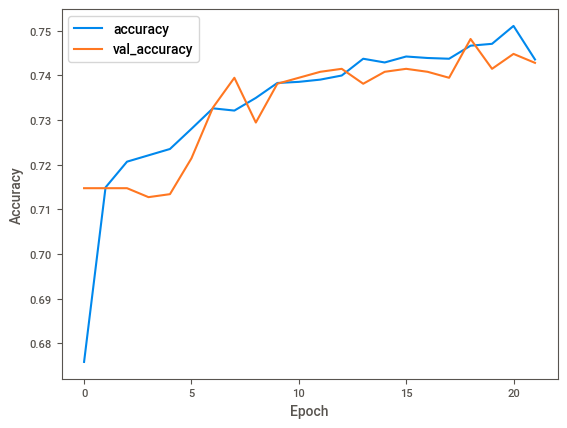

In [54]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Model evaluation

In [55]:
# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall, test_auc = model.evaluate(test_ds)

# Print evaluation metrics
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test AUC: {test_auc:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7406 - auc: 0.7207 - loss: 0.5125 - precision: 0.7774 - recall: 0.9106 
Test Loss: 0.5169
Test Accuracy: 0.7430
Test Precision: 0.7762
Test Recall: 0.9170
Test AUC: 0.7148


### Analysis:

1. **Accuracy**: 
   - This indicates that the model correctly predicts the outcome about approximately 75% of the time. This is a solid performance, demonstrating a good level of accuracy.

2. **Loss**: 
   - Lower loss indicates better model performance in terms of prediction accuracy. The loss value being stable shows that the model's error rate remains consistent.

3. **Precision**: 
   - Precision measures the accuracy of positive predictions, indicating that about 78% of the positive predictions are correct. This is a good indication that the model makes reliable positive predictions.

4. **Recall**: 
   - Recall measures the model's ability to identify all relevant instances in the dataset. A recall of approximately 92% means the model captures a high percentage of the actual positive cases, which is excellent for scenarios where it is crucial to identify positive cases correctly.

5. **AUC**: 
   - AUC (Area Under the ROC Curve) measures the model's ability to distinguish between positive and negative classes. An AUC of approximately 0.72 indicates a good level of separability, meaning the model performs well in distinguishing between the two classes.

### Conclusion:

**Improved Performance**:
- **Balanced Metrics**: The updated model shows balanced performance across accuracy, precision, recall, and AUC.
- **No Signs of Overfitting**: The close match between the validation and test metrics suggests that the model generalizes well to unseen data.
- **High Recall and Precision**: The high recall and precision are particularly good indicators of the model’s reliability in predicting positive cases accurately and capturing the majority of actual positives.

### Recommendations:

1. **Hyperparameter Tuning**: Continue to fine-tune hyperparameters like learning rate, batch size, and number of epochs to further optimize performance.
2. **Feature Engineering**: Explore additional feature engineering techniques to potentially boost model performance. Consider creating new features or removing less significant ones.
3. **Regularization**: Maintain regularization techniques like dropout and potentially add others (e.g., L2 regularization) to keep overfitting in check.
4. **Cross-Validation**: Use cross-validation to ensure that the model’s performance is consistent across different subsets of the data.

### Summary:

The updated model shows good performance with balanced precision and recall, and it generalizes well to unseen data, indicating a positive improvement. The stability across validation and test metrics suggests a robust model, and further fine-tuning could potentially yield even better results. 

# Peform Inference

## Save model

In [56]:
import os

In [57]:
# Define the directory to save the model
model_dir = 'model'
os.makedirs(model_dir, exist_ok=True)

# Define the path to save the model within the 'model' folder
model_path = os.path.join(model_dir, 'my_pet_classifier.keras')

# Save the entire model to a HDF5 file
model.save(model_path)

In [58]:
# Define the path where the model was saved
model_dir = 'model'
model_path = os.path.join(model_dir, 'my_pet_classifier.keras')

# Load the model from the HDF5 file
reloaded_model = tf.keras.models.load_model(model_path)

In [59]:
# Function to process user input
def process_user_input(user_input):
    input_key_to_lower_case = {key.lower(): value for key, value in user_input.items()}
    # Create a copy of the input data
    data = pd.DataFrame([input_key_to_lower_case])  # Create DataFrame from single dict
    
    # Apply binning functions
    binAge(data)
    binPhotoAmt(data)
    binQuantity(data)
    binBreed(data)
    binState(data)
    
    # Select and format processed features
    processed_input = {
        'agebins': data['agebins'].values[0],  
        'sterilized': data['sterilized'].values[0],  
        'photoamtbins': data['photoamtbins'].values[0],  
        'breedbins': data['breedbins'].values[0],  
        'vaccinated': data['vaccinated'].values[0],  
        'statebins': data['statebins'].values[0],  
        'quantitybins': data['quantitybins'].values[0]  
    }
    
    return processed_input

In [60]:
user_input = {
    'type': 'Cat',
    'name': 'tim',
    'age': 2,
    'breed1': 'Mixed Breed',
    'breed2': None,
    'gender': 'Male',
    'color1': 'Black',
    'color2': None,
    'color3': None,
    'maturitysize': 'Large',
    'furlength': 'Small',
    'vaccinated': 'Yes',
    'dewormed': 'Yes',
    'sterilized': 'Yes',
    'health': 'Healthy',
    'quantity': 1,
    'fee': 100,
    'state': 'xxx',
    'rescuerid': 'yyy',
    'videoamt': 2,
    'description': None,
    'petid': 'saf012173821asd87a',
    'photoamt': 3
}


processed_input = process_user_input(user_input)

input_dict = {name: tf.convert_to_tensor([value]) for name, value in processed_input.items()}
predictions = reloaded_model.predict(input_dict)
prob = tf.nn.sigmoid(predictions[0])

print(
    "This particular pet had a %.1f percent probability "
    "of getting adopted." % (100 * prob)
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
This particular pet had a 63.9 percent probability of getting adopted.
